# Image classification using deep neural network

- We will implement all the functions required to build a deep neural network independently.
- We will later use the functions to build a deep neural network for image classification.The notations used are as below

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).


In [1]:
#Loading necessary packages
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
#Setting plot graphics
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(123)

## Steps to be followed

To build the deep neural network we will implement the following steps: 

- We initialize the parameters 
- We implement forward propagation.Forward propogation is implemented as following
     - First compute the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - We define and impelment the ACTIVATION function (relu/sigmoid).
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - We then stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$) which gives a new L_model_forward function.
- Compute the loss.
- Implement backward propagation 
    - We will first compute the LINEAR part of a layer's backward propagation step.
    - then compute the gradient of the ACTIVATE function (relu_backward/sigmoid_backward) 
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function.
    - We then stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- We update the parameters.

The important thing to keep in mind is that for every forward function, there is a corresponding backward function. That is why at every step of forward propogation we will be storing some values in a cache. The cached values are used for computing gradients. In the backpropagation module we then use the cache to calculate the gradients. 

##  Initialization

We will build two helper functions that will initialize the parameters for the model. 
- The first function will be used to initialize parameters for a two layer model. It will take the following arguments as inputs
        - n_x : size of the input layer
        - n_h : size of the hidden layer
        - n_y : size of the output layer
       - It will return the following:
         - parameters : python dictionary containing the parameters:
                   - W1 :weight matrix of shape (n_h, n_x)
                   - b1 : bias vector of shape (n_h, 1)
                   - W2 : weight matrix of shape (n_y, n_h)
                   - b2 : bias vector of shape (n_y, 1)
- The second one will generalize this initialization process to $L$ layers.


###  2-layer Neural Network

- The model's structure is: *LINEAR -> RELU -> LINEAR -> SIGMOID*. 


In [2]:
def initialize_parameters(n_x, n_h, n_y):
   
    np.random.seed(123)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

### Building  L-layer Neural Network

The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep`, we should make sure that your dimensions match between each layer. Recall that $n^{[l]}$ is the number of units in layer $l$. Thus for example if the size of our input $X$ is $(12288, 209)$ (with $m=209$ examples) then:

<table style="width:100%">


    <tr>
        <td>  </td> 
        <td> **Shape of W** </td> 
        <td> **Shape of b**  </td> 
        <td> **Activation** </td>
        <td> **Shape of Activation** </td> 
    <tr>
    
    <tr>
        <td> **Layer 1** </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        
        <td> $(n^{[1]},209)$ </td> 
    <tr>
    
    <tr>
        <td> **Layer 2** </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>
   
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>
    
   <tr>
        <td> **Layer L-1** </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
    <tr>
    
    
   <tr>
        <td> **Layer L** </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>

</table>


#### Model structure for L-layers

- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. I.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- We use random initialization for the weight matrices
- We use zeros initialization for the biases
- We will store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`.
The function will take the following arguments and returns the following:
    
    Arguments:
    layer_dims: python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters:  python dictionary containing parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)

In [3]:
def initialize_parameters_deep(layer_dims):
 
    
    np.random.seed(123)
    parameters = {}
    # number of layers in the network
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

##  Forward propagation

### Linear Forward 

We implement the functions in the following steps
- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$$

where $A^{[0]} = X$. 

The linear_forward functions takes the following arguments :
    Arguments:
    - A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    - W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    - b -- bias vector, numpy array of shape (size of the current layer, 1)
It returns the following
    Returns:
    - Z -- the input of the activation function
    - cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently


In [4]:
def linear_forward(A, W, b):
    
    
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

### Linear-Activation Forward

We will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). 

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$.This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function).

- The forward propagation for the LINEAR->ACTIVATION layer has the following arguments and returns

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function
    cache -- a python dictionary containing "linear_cache" and "activation_cache"
         

In [5]:

def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

def linear_activation_forward(A_prev, W, b, activation):

    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
     
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

#### L_model_forward
    
   - [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    - Arguments:
       X -- data, numpy array of shape (input size, number of examples)
       parameters -- output of initialize_parameters_deep()
    
    - Returns:
       AL -- last post-activation value
       caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
  

In [6]:
def L_model_forward(X, parameters):


    caches = []
    A = X
    # number of layers in the neural network
    L = len(parameters) // 2                  
    
    # Implementing [LINEAR -> RELU]*(L-1). 
    #Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, 
                                             parameters['W' + str(l)], 
                                             parameters['b' + str(l)], 
                                             activation='relu')
        caches.append(cache)
    # Implementing LINEAR -> SIGMOID. 
    #Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, 
                                          parameters['W' + str(L)], 
                                          parameters['b' + str(L)], 
                                          activation='sigmoid')
    caches.append(cache)
    
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

## Cost function
We compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$


In [7]:
def compute_cost(AL, Y):
    """
   
    Arguments:
    AL -- probability vector corresponding to the label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Computing loss from aL and y.
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    
    cost = np.squeeze(cost)     
    assert(cost.shape == ())
    
    return cost

## Backward propagation

We build backward propagation in three steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

###  Linear backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l]})$ are computed using the input $dZ^{[l]}$.
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{}$$


In [8]:
def linear_backward(dZ, cache):
    """
    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
 
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

###  Linear-Activation backward

We create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**. 

- sigmoid_backward: Implements the backward propagation for SIGMOID unit. 

     dZ = sigmoid_backward(dA, activation_cache)
     
     
- relu_backward: Implements the backward propagation for RELU unit. 

     dZ = relu_backward(dA, activation_cache)


In [9]:
#We define relu_backward and sigmoid_backward function

def relu_backward(dA, cache):
    """
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ



def linear_activation_backward(dA, cache, activation):
    """
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
   
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
      
    return dA_prev, dW, db

###  L-Model Backward 

- Recall that when we implemented the `L_model_forward` function, at each iteration, we stored a cache which contains (X,W,b, and z). In the back propagation, we will use those variables to compute the gradients. 

- Therefore, in the `L_model_backward` function, we will iterate through all the hidden layers backward, starting from layer $L$.

- On each step, we will use the cached values for layer $l$ to backpropagate through layer $l$. 

- We implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

In [10]:
def L_model_backward(AL, Y, caches):
    """   
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    # Initializing the backpropagation
   
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
  
    
    # Lth layer (SIGMOID -> LINEAR) gradients. 
    #Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
  
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
   
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". 
        #Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
      

    return grads

###  Updating Parameters

We update the parameters of the model using gradient descent:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \ $$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \  $$

where $\alpha$ is the learning rate. After computing the updated parameters, we store them in the parameters dictionary. 

In [11]:

def update_parameters(parameters, grads, learning_rate):
    """
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    # number of layers in the neural network
    L = len(parameters) // 2 

    # Update rule for each parameter
   
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

# Cat Vs Non Cat classification

We will use the same cat vs non-cat(train vs test) dataset used in Project 1.The logistic regression approach has given us 70% accuracy on the test set.We will now implement a deep neural net and check whether it improves the accuracy.
For review the testand train data sets has the following features:
 - a training set of m_train images labelled as cat (1) or non-cat (0)
- a test set of m_test images labelled as cat and non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

We follow the similar approach to load the dataset and for pre processing as in Project 1.Please refer to Project 1 for details.

In [12]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(123)
# Loading the data (cat/non-cat)
#Function to load data set
#Data is contained in train.h5 and test.h5 files from the Datasets folder in github
def load_dataset():
    train_dataset = h5py.File('train.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


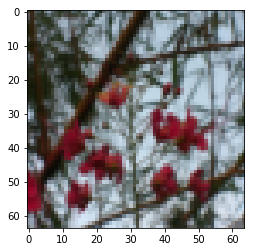

In [13]:
# Example of a picture in the data set
index = 46
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [14]:
# dataset 
m_train = train_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
m_test = test_set_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x_orig shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_orig shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_set_x_orig shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x_orig shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


### Preprocessing
- Reshape and standardize

In [15]:
# Reshaping the training and test examples 
train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


##  Building a Two-layer neural network
The deep learning methodology is as follows:
1. Initialize parameters / Define hyperparameters
2. Loop for num_iterations:
    a. Forward propagation
    b. Compute cost function
    c. Backward propagation
    d. Update parameters (using parameters, and grads from backprop) 
4. Use trained parameters to predict label

We implement a 2-layer neural network with 6 as hidden node size

In [16]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 6 #Change the node size if necessary
n_y = 1
layers_dims = (n_x, n_h, n_y)
#To change the num_iterations or learning rate change the input parameters for the two_layer_model_function

In [17]:

def two_layer_model(X, Y, layers_dims, learning_rate=0.007, num_iterations=2500,print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    # to keep track of the cost
    costs = []   
    # number of examples
    m = X.shape[1]                           
    (n_x, n_h, n_y) = layers_dims
    
    # Initializing parameters dictionary, by calling one of the functions we previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
  
    
    # Getting W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # implementing gradient descent

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. 
        #Inputs: "X, W1, b1".
        #Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        # Computing cost
        cost = compute_cost(A2, Y)
      
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation.
        #Inputs: "dA2, cache2, cache1". 
        #Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
       
        
        # Setting grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Updating parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieving W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plotting the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6957503266639485
Cost after iteration 100: 0.644488838048352
Cost after iteration 200: 0.6293939040707395
Cost after iteration 300: 0.5979186035290339
Cost after iteration 400: 0.5568386925112074
Cost after iteration 500: 0.5147092007993719
Cost after iteration 600: 0.47725423535077316
Cost after iteration 700: 0.44395456774000613
Cost after iteration 800: 0.42631747961374666
Cost after iteration 900: 0.3909078349372407
Cost after iteration 1000: 0.3841498785203415
Cost after iteration 1100: 0.3441814560165167
Cost after iteration 1200: 0.32007949033683075
Cost after iteration 1300: 0.29208436971375007
Cost after iteration 1400: 0.28418405804976715
Cost after iteration 1500: 0.2659853457350894
Cost after iteration 1600: 0.2788320423414656
Cost after iteration 1700: 0.2130824295582841
Cost after iteration 1800: 0.19929040283557287
Cost after iteration 1900: 0.1979240868415733


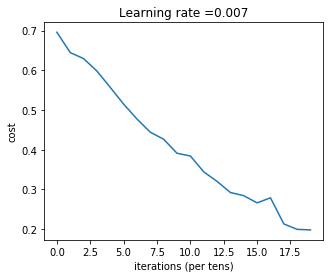

In [18]:
parameters = two_layer_model(train_x, train_set_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2000, print_cost=True)

# Predict

Implementing predict function for testing accuracy of our model

In [19]:
def predict(X, y, parameters):
    """
     
    Arguments:
    X -- data set of examples we wantto label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    # number of layers in the neural network
    n = len(parameters) // 2 
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [20]:
predictions_train = predict(train_x, train_set_y, parameters)

Accuracy: 0.99043062201


In [21]:
predictions_test = predict(test_x, test_set_y, parameters)

Accuracy: 0.74


The accuracy has increased to 74% using 2 layer neural net compared to 70% using logistic regression.We can furthur improve the accuracy by adding more layers to our neural net architecture as done below

## Building L-layer deep neural net


In [22]:
#Constants
#Change the following parameters to furthur build deeper nets
# layers_dims is list containing the input size and each layer size, of length (number of layers + 1).
#  We build a 5-layer model using all the functions built above
layers_dims = [12288, 20, 7, 5, 1] 

In [27]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(123)
    # keep track of cost
    costs = []                         
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
   
    
    # gradient descent
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Computing cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Updating parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plotting the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.709639
Cost after iteration 100: 0.550395
Cost after iteration 200: 0.512910
Cost after iteration 300: 0.460497
Cost after iteration 400: 0.530562
Cost after iteration 500: 0.330250
Cost after iteration 600: 0.256110
Cost after iteration 700: 0.308008
Cost after iteration 800: 0.428743
Cost after iteration 900: 0.134455
Cost after iteration 1000: 0.070532
Cost after iteration 1100: 0.088272
Cost after iteration 1200: 0.029788
Cost after iteration 1300: 0.020216
Cost after iteration 1400: 0.015187
Cost after iteration 1500: 0.011975
Cost after iteration 1600: 0.009769
Cost after iteration 1700: 0.008178
Cost after iteration 1800: 0.006968
Cost after iteration 1900: 0.006027
Cost after iteration 2000: 0.005279
Cost after iteration 2100: 0.004675
Cost after iteration 2200: 0.004177
Cost after iteration 2300: 0.003766
Cost after iteration 2400: 0.003417


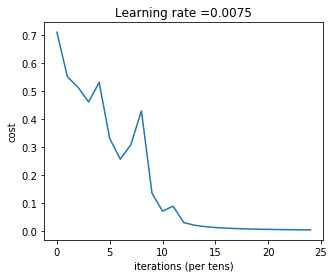

In [28]:
#Training the model
parameters = L_layer_model(train_x, train_set_y, layers_dims, num_iterations=2500, print_cost=True)

In [29]:
#Train Prediction
pred_train = predict(train_x, train_set_y, parameters)

Accuracy: 1.0


In [30]:
#Test Prediction
pred_test = predict(test_x, test_set_y, parameters)

Accuracy: 0.7


In [31]:
# Printing Mislabelled images
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

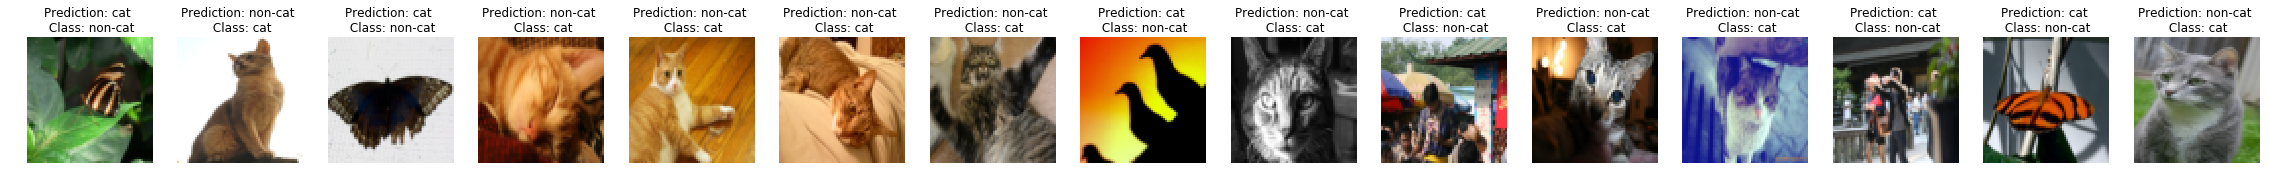

In [32]:
print_mislabeled_images(classes, test_x, test_set_y, pred_test)

### References:

- The framework is based upon the assignments in Neural Networks and Deep Learning course by Andrew Ng in Coursera